In [137]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, centroid
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor

In [269]:
vertebral_data = pd.read_csv('dat', header=None, sep=" ").values
data, label = vertebral_data[:, [0, 4]], vertebral_data[:, -1]

or_data = vertebral_data[:, :-1]
print("Original (data, label): ", data.shape, label.shape)

Original (data, label):  (310, 2) (310,)


### Remove Outlier

In [270]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(data)

mask = yhat != -1

removed_outlier = []
for i, v in enumerate(mask):
    if not v:
        removed_outlier.append(i)
print("Removed Outlier index: ", removed_outlier)

data, label = data[mask, :], label[mask]
print("Left (data, label): ", data.shape, label.shape)

Removed Outlier index:  [9, 35, 40, 53, 83, 85, 115, 155, 162, 163, 167, 168, 173, 180, 190, 206, 215, 304]
Left (data, label):  (292, 2) (292,)


### Normalization

In [271]:
min_max_scalar = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scalar.fit_transform(data)

### Plot Stack Bar Chart

In [5]:
def rotated(array_2d):
    list_of_tuples = zip(*array_2d[::-1])
    return [list(elem) for elem in list_of_tuples]

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):

    ny = len(data[0])
    ind = list(range(ny))
    print(ny)

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [170]:
data

array([[63.03, 22.55, 39.61, 40.48, 98.67],
       [39.06, 10.06, 25.02, 29.0, 114.41],
       [68.83, 22.22, 50.09, 46.61, 105.99],
       ...,
       [61.45, 22.69, 46.17, 38.75, 125.67],
       [45.25, 8.69, 41.58, 36.56, 118.55],
       [33.84, 5.07, 36.64, 28.77, 123.95]], dtype=object)

[[0.52304638 0.51872146 0.29525017 0.41439927 0.27004393]
 [0.1830946  0.29059361 0.12704635 0.23891776 0.48613399]
 [0.60530421 0.51269406 0.41607102 0.5081015  0.37053817]
 ...
 [0.50063821 0.52127854 0.37087849 0.38795475 0.64071938]
 [0.27088356 0.26557078 0.31796172 0.35447875 0.5429709 ]
 [0.10906254 0.19945205 0.26100991 0.23540202 0.61710599]]
295


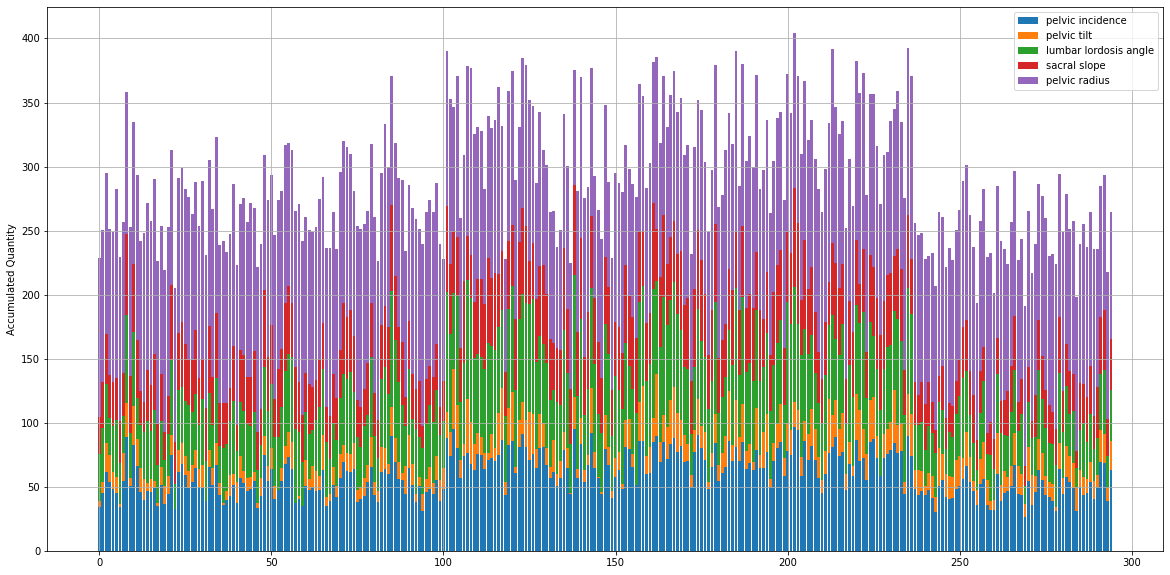

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

series_labels =["pelvic incidence","pelvic tilt","lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis"]

print(x_scaled)
rotated_data = [rotated(x_scaled), rotated(data), rotated(or_data)]
name = ['normalized', 'removed_outlier', 'orignal']

# for i, v in enumerate(rotated_data):
plot_stacked_bar(
    rotated(data),
    series_labels,
    value_format="{:.1f}",
    y_label="Accumulated Quantity"
)
plt.savefig(f'output/bar_{name[1]}.png')
plt.show()

### Get Cluster Info Function

In [264]:
def getClusterResult(nOfCluster,clusterInfo):
    kclusters = fcluster(clusterInfo, nOfCluster, criterion='maxclust')

    # build a table to show the number of count
    clusterCount = []
    for i in range(0,nOfCluster):
        clusterCount.append(0)
    for i in range(0,len(kclusters)):
        clusterCount[kclusters[i]-1] += 1;
    for i in range(0,nOfCluster):
        print(f'Cluster {str(i+1)}: {str(clusterCount[i])} data')
#         print(str(i+1) + " : "+str(clusterCount[i])+'\n')
    return kclusters

## Linkage Comparison
> compare single link/ complete link/ groupa average for the first question
### Single Link

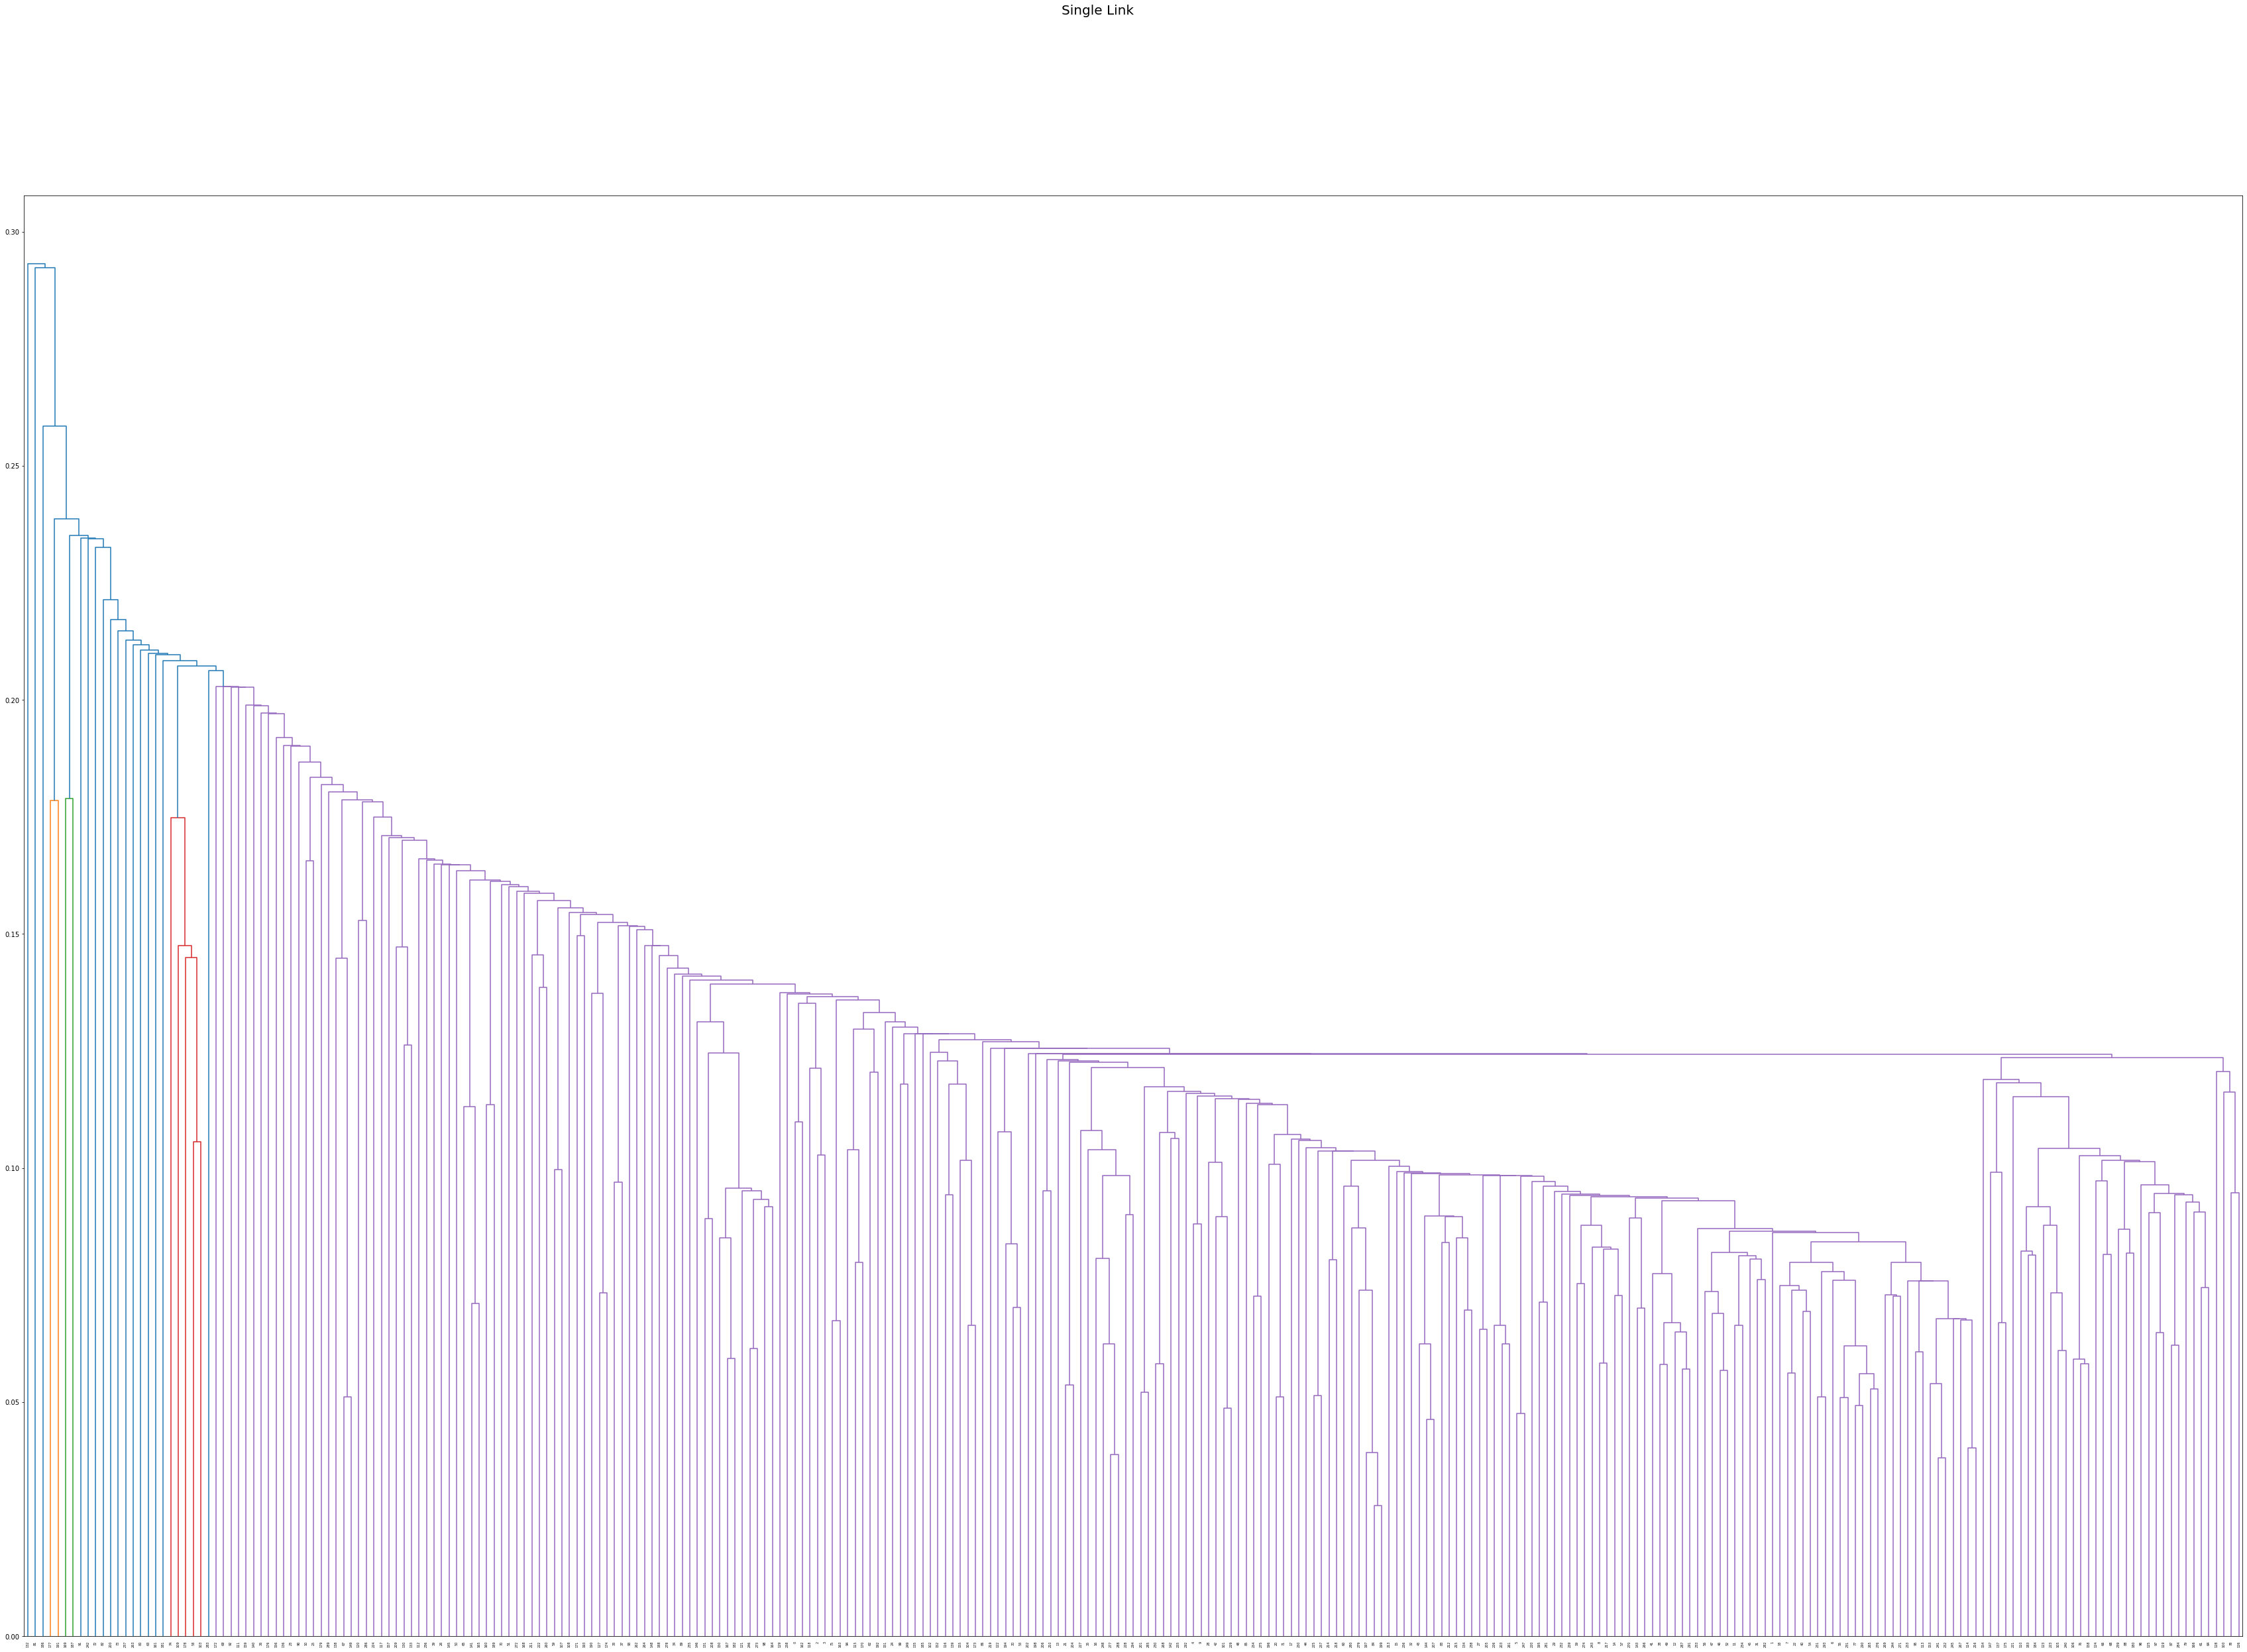

In [177]:
singleLink = linkage(x_scaled, 'single')
fig = plt.figure(figsize=(60, 40))
fig.suptitle('Single Link', fontsize=20)
# plt.xticks( fontsize=20)
dn = dendrogram(singleLink)
# plt.savefig('output/single_link.png')
plt.show()

In [178]:
singleRe = getClusterResult(3,singleLink)

Cluster 1: 293 data
Cluster 2: 1 data
Cluster 3: 1 data


### Complete Link

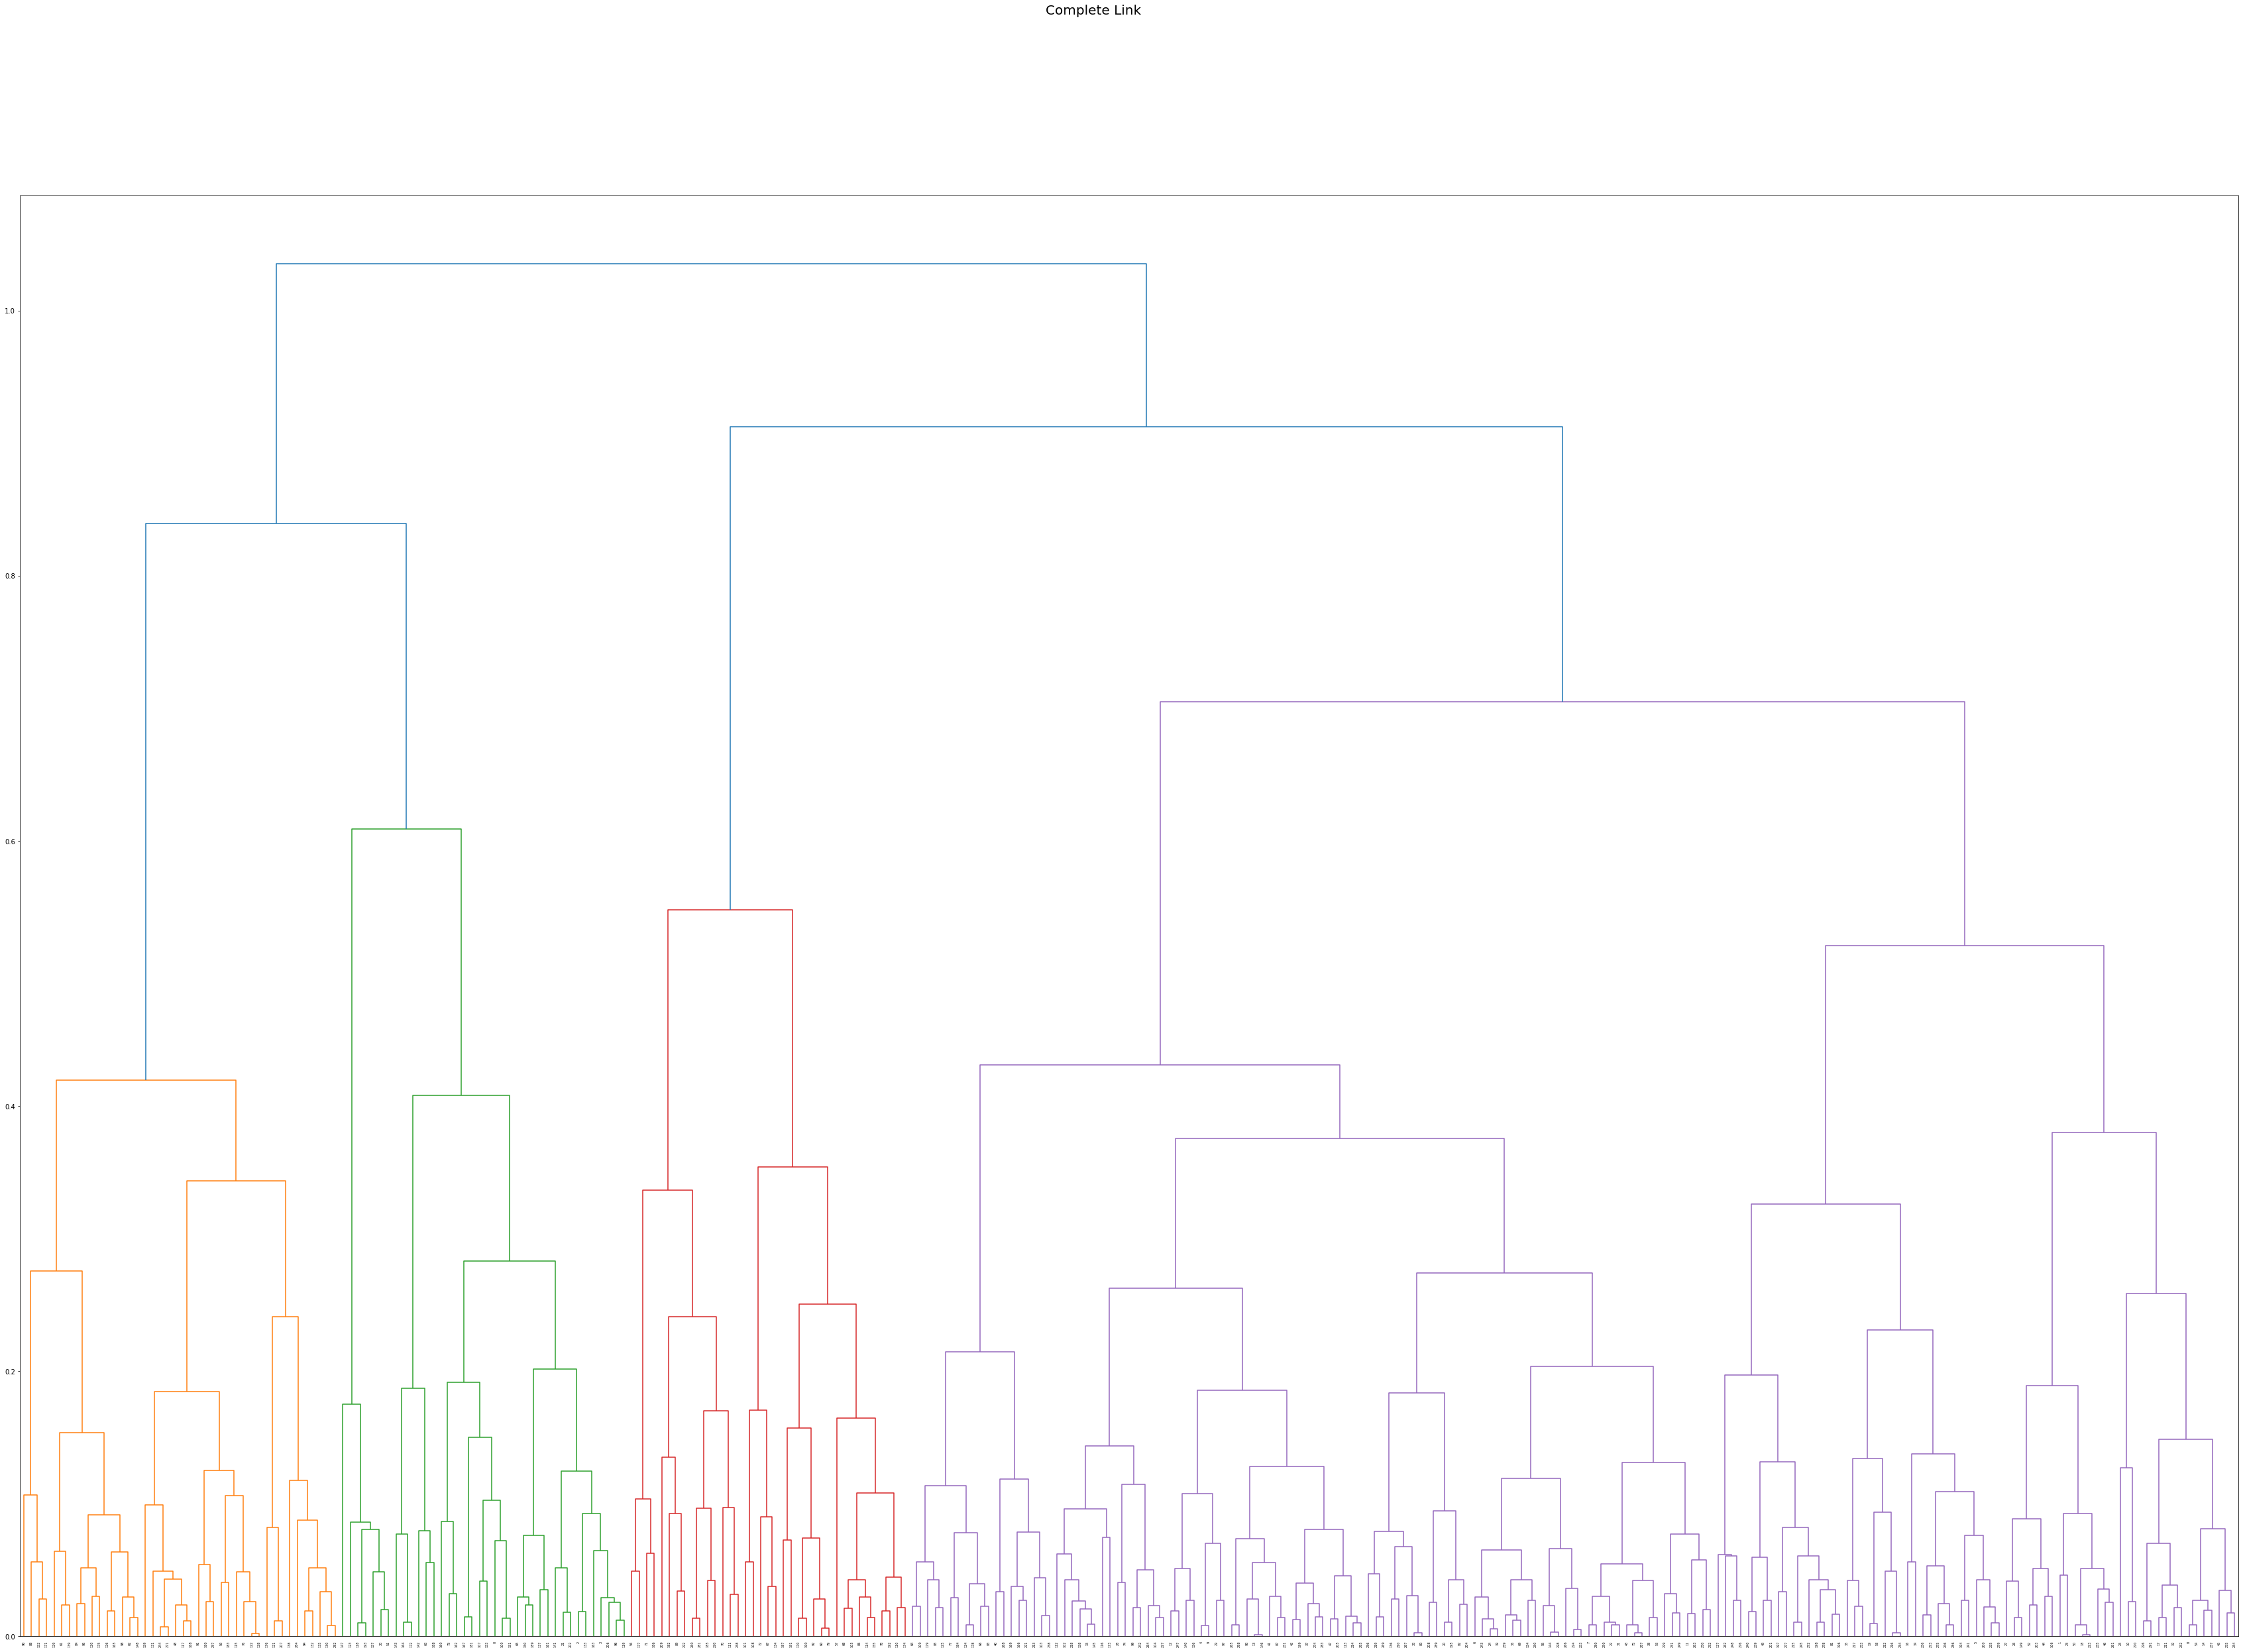

In [272]:
completeLink = linkage(x_scaled, 'complete')

fig = plt.figure(figsize=(60, 40))
fig.suptitle('Complete Link', fontsize=20)
# plt.xticks( fontsize=20)
dn = dendrogram(completeLink)
# plt.savefig('output/complete_link.png')
plt.show()

In [273]:
completeRe = getClusterResult(3,completeLink)
print(len(completeRe))

Cluster 1: 80 data
Cluster 2: 37 data
Cluster 3: 175 data
292


In [274]:
from sklearn.metrics import accuracy_score

def createNumArr(dat,mapper):
    result = []
    for i in range(0,len(dat)):
        result.append(mapper[dat[i]])
    return result

In [275]:
import itertools
lists = list(itertools.permutations([1, 2, 3]))
for i in range(0,len(lists)):
    print({"DH":lists[i][0],"SL":lists[i][1],"NO":lists[i][2]})
    print(accuracy_score(createNumArr(label,{"DH":lists[i][0],"SL":lists[i][1],"NO":lists[i][2]}), completeRe))

{'DH': 1, 'SL': 2, 'NO': 3}
0.4178082191780822
{'DH': 1, 'SL': 3, 'NO': 2}
0.18835616438356165
{'DH': 2, 'SL': 1, 'NO': 3}
0.5102739726027398
{'DH': 2, 'SL': 3, 'NO': 1}
0.17123287671232876
{'DH': 3, 'SL': 1, 'NO': 2}
0.410958904109589
{'DH': 3, 'SL': 2, 'NO': 1}
0.3013698630136986


### Group Average Link

In [20]:
averageLink = linkage(x_scaled, 'average')

fig = plt.figure(figsize=(60, 40))
fig.suptitle('Group Average', fontsize=20)
# plt.xticks(fontsize=20)
dn = dendrogram(averageLink)
# plt.savefig('output/average_link.png')
plt.show()

In [21]:
averageRe = getClusterResult(3,averageLink)

Cluster 1: 174 data
Cluster 2: 123 data
Cluster 3: 1 data


# Distance comparison

In [ ]:
sing_dis = singleLink[:, 2]
cp_dis = completeLink[:, 2]
av_dis = averageLink[:, 2]

x = range(0, 297)
fig, ax = plt.subplots()

ax.plot(x, sing_dis, label = "Single Linkage")
ax.plot(x, cp_dis, label = "Complete Linkage")
ax.plot(x, av_dis, label = "Group Average")
leg = ax.legend();

plt.xlabel('data')
plt.ylabel('distance')
ax.legend(loc='upper left', frameon=False)

plt.title('Distance comparison')
plt.show()

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

fig = plt.figure(figsize=(30, 20))
fig, ax1 = plt.subplots()
stepper = numpy.arange(297);
for i in range(0,297):
    stepper[i] = -stepper[i]+10;

ax2 = ax1.twinx();
ax2.bar(numpy.arange(297), averageLink[:,3], color="#2ca02c", width=0.1)
ax2.bar(numpy.arange(297), completeLink[:,3], color="#ff7f0e", width=0.1)
ax2.bar(numpy.arange(297), singleLink[:,3], color="#1f77b4", width=0.1)

ax1.plot(averageLink[:,2], color="#2ca02c")
ax1.plot(completeLink[:,2], color="#ff7f0e")
ax1.plot(singleLink[:,2], color="#1f77b4")

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

fig = plt.figure(figsize=(25, 15))
fig, ax1 = plt.subplots()
# stepper = numpy.arange(20);
# for i in range(0,20):
#     stepper[i] = -stepper[i]+10;

ax2 = ax1.twinx();
ax2.bar(numpy.arange(10)+0.2, averageLink[-10:,3], color="#2ca02c", width=0.2)
ax2.bar(numpy.arange(10), completeLink[-10:,3], color="#ff7f0e", width=0.2)
ax2.bar(numpy.arange(10)+0.4, singleLink[-10:,3], color="#1f77b4", width=0.2)

ax1.plot(averageLink[-10:,2], 'go-', color="#2ca02c")
ax1.plot(completeLink[-10:,2], 'ro-', color="#ff7f0e")
ax1.plot(singleLink[-10:,2], 'bo-', color="#1f77b4")

# K-Means

In [32]:
completeRe

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 2, 3, 3, 3,
       1, 3, 2, 2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 3,
       2, 1, 1, 1, 3, 2, 3, 3, 1, 3, 3, 3, 3, 1, 1, 2, 3, 1, 2, 2, 2, 2,
       3, 3, 2, 3, 2, 3, 2, 2, 1, 1, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 3, 2,
       1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 2, 2, 3, 2, 2, 3, 3,
       3, 1, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 3, 1, 2, 2, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1], dtype=i

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

km = KMeans(n_clusters=3)
km.fit(x_scaled)
km.labels_


def cna(dat,mapper):
    result = []
    for i in range(0,len(dat)):
        result.append(mapper[dat[i]])
    return result

lists = list(itertools.permutations([1, 2, 3]))
for i in range(0,len(lists)):
    print({"DH":lists[i][0],"SL":lists[i][1],"NO":lists[i][2]})
    clusterIn = cna(label, {"DH":lists[i][0],"SL":lists[i][1],"NO":lists[i][2]})
    

{'DH': 1, 'SL': 2, 'NO': 3}
{'DH': 1, 'SL': 3, 'NO': 2}
{'DH': 2, 'SL': 1, 'NO': 3}
{'DH': 2, 'SL': 3, 'NO': 1}
{'DH': 3, 'SL': 1, 'NO': 2}
{'DH': 3, 'SL': 2, 'NO': 1}


In [188]:
maxer = 0;
# print(clusterIn)
    
for i in range(0,len(lists)):
    tempK = []
    for j in range(0,len(km.labels_)):
        tempK.append(lists[i][km.labels_[j]])

    maxer = max(maxer,accuracy_score(tempK, clusterIn))
    print(f"DH/ SL/ NO : {lists[i][0]}/ {lists[i][1]}/ {lists[i][2]} \
=> Acc Score = {accuracy_score(tempK, clusterIn)}")
    print(confusion_matrix(tempK, clusterIn))
    
maxer

DH/ SL/ NO : 1/ 2/ 3 => Acc Score = 0.06040268456375839
[[ 0 58  0]
 [75 11 50]
 [24 73  7]]
DH/ SL/ NO : 1/ 3/ 2 => Acc Score = 0.412751677852349
[[ 0 58  0]
 [24 73  7]
 [75 11 50]]
DH/ SL/ NO : 2/ 1/ 3 => Acc Score = 0.4697986577181208
[[75 11 50]
 [ 0 58  0]
 [24 73  7]]
DH/ SL/ NO : 2/ 3/ 1 => Acc Score = 0.4429530201342282
[[24 73  7]
 [ 0 58  0]
 [75 11 50]]
DH/ SL/ NO : 3/ 1/ 2 => Acc Score = 0.4966442953020134
[[75 11 50]
 [24 73  7]
 [ 0 58  0]]
DH/ SL/ NO : 3/ 2/ 1 => Acc Score = 0.1174496644295302
[[24 73  7]
 [75 11 50]
 [ 0 58  0]]


0.4966442953020134

In [155]:
print(
    """
DH/ SL/ NO : 3/ 2/ 1 => Acc Score = 0.87087231346149312
[[58   0   6]
 [ 0 127   9]
 [ 3   6 103]]
    """
)


DH/ SL/ NO : 3/ 2/ 1 => Acc Score = 0.87087231346149312
[[58   0   6]
 [ 0 127   9]
 [ 3   6 103]]
    


In [106]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled)
kl = kmeans.labels_

print(kmeans.cluster_centers_)

[[0.18758101 0.35277042 0.25446059 0.30069056 0.59477663 0.108691  ]
 [0.60611982 0.65794434 0.70399197 0.58827576 0.58115094 0.58804206]
 [0.4202395  0.39497966 0.49649293 0.56959469 0.42815523 0.27059773]]


In [186]:
# kl+=1
print(kl)
print(len(completeLink))

[3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 3 3 2 3 3 3 3 3 2 2 1 2 2 3
 3 1 2 2 2 2 2 3 1 1 3 3 3 2 3 2 2 3 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 3 2
 1 3 3 2 2 3 3 3 3 2 2 3 1 3 3 2 2 2 2 2 2 2 3 2 2 2 3 2 2 3 3 3 3 3 3 3 1
 3 2 3 3 3 2 3 2 1 2 3 2 1 3 3 3 3 3 3 3 3 2 2 3 2 2 2 2 3 3 2 2 3 2 2 3 3
 3 3 3 3 3 2 2 3 3 2 2 2 2 1 1 1 1 1 1 1 1 1 1 3 1 1 3 3 3 3 3 1 1 3 1 1 1
 1 1 3 3 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 3 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 1 3 1 1 1 3 1 1 1 3 3 1 3 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1
 1 1]
294


ValueError: x and y must be the same size

<Figure size 7200x1440 with 0 Axes>

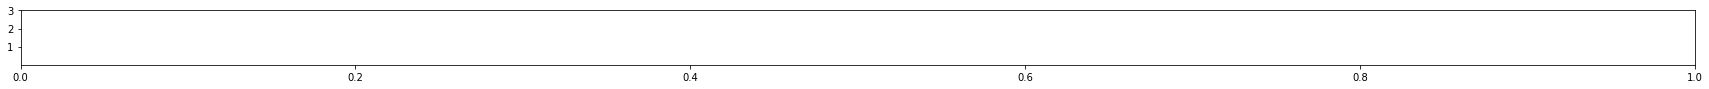

In [187]:
fig = plt.figure(figsize=(100, 20))

plt.rcParams["figure.figsize"] = (30, 1)
fig, ax1 = plt.subplots()
x = range(0, 294);
plt.yticks([1, 2, 3])

ax1.scatter(x, clusterIn, label = "K-Means", alpha=1)
ax1.scatter(x, completeRe, label = "Complete Linkage", alpha=0.5)

<Figure size 7200x1440 with 0 Axes>

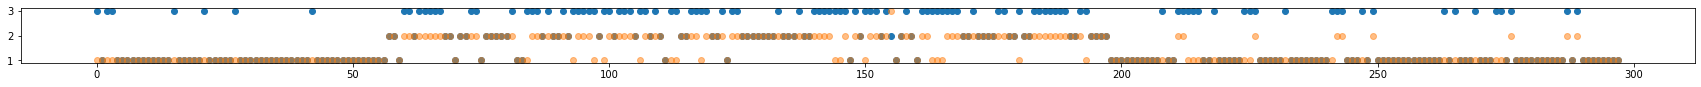

In [161]:
fig = plt.figure(figsize=(100, 20))

plt.rcParams["figure.figsize"] = (30, 1)
fig, ax1 = plt.subplots()
x = range(0, 298);
plt.yticks([1, 2, 3])

ax1.scatter(x, kl, label = "K-Means", alpha=1)
ax1.scatter(x, averageRe, label = "Average Linkage", alpha=0.5)

<Figure size 7200x1440 with 0 Axes>

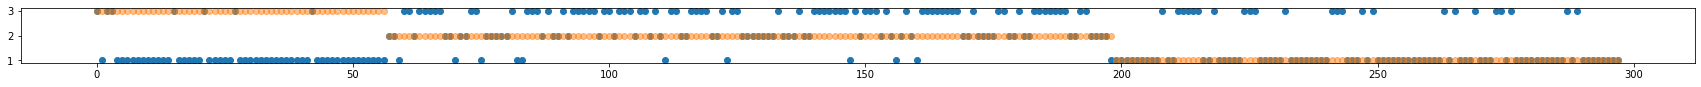

In [162]:
fig = plt.figure(figsize=(100, 20))

plt.rcParams["figure.figsize"] = (30, 1)
fig, ax1 = plt.subplots()
x = range(0, 298);
plt.yticks([1, 2, 3])

ax1.scatter(x, kl, label = "K-Means", alpha=1)
ax1.scatter(x, clusterIn, label = "Complete Linkage", alpha=0.5)